In [33]:
# import the usual modules
# to manage directories
import os
# to handle matrix computations
import numpy as np
# to handle tabular data
import pandas as pd
# to handle plots and graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# if fanalysis is already installed, import it - else install and import it
try:
    from fanalysis.pca import PCA
except:
    !pip install fanalysis
    from fanalysis.pca import PCA

In [35]:
# get current working directory
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track'

In [36]:
PATH ="/Users/clement.guiraud/Desktop/Data analysis/Data analysis track"
os.chdir(PATH)
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track'

In [37]:
# import data from Excel file - index_col = 0 indicates that the first column is a label
import pandas
D = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_ACTIF",index_col=0)

# print dataset summary
print(D.info())

# define dimensions of [X] matrix : number of variables
p = D.shape[1]

# define sample size of [X] : number of observations
n = D.shape[0]

# define values of matrix [X]
X = D.values

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   VMAX    18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes
None


In [38]:
# import PCA module from fanalysis package
from fanalysis.pca import PCA

# instantiate acp object form PCA class
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)

# run PCA on X observed data
acp.fit(X)

# print methods and attributes of acp object
print(dir(acp))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'col_contrib_', 'col_coord_', 'col_cor_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_topandas', 'correlation_circle', 'eig_', 'eigen_vectors_', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'means_', 'model_', 'n_components', 'n_components_', 'plot_col_contrib', 'plot_col_cos2', 'plot_eigenvalues', 'plot_row_contrib', 'plot_row_cos2', 'row_contrib_', 'row_coord_'

In [39]:
acp.col_labels

Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'VMAX'], dtype='object')

In [40]:
acp.row_labels

Index(['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300'],
      dtype='object', name='Modele')

### Determine the number of factors

In [42]:
a = np.matrix(acp.eig_)
pd.DataFrame(a, index=['eigenvalue','variance.percent','cumulative.variance.percent'], columns=['dim1','dim2','dim3','dim4','dim5','dim6','])

,dim1,dim2,dim3,dim4,dim5,dim6
eigenvalue,4.420858,0.856062,0.373066,0.213922,0.092801,0.043290
variance.percent,73.680968,14.267705,6.217768,3.565368,1.546687,0.721505
cumulative.variance.percent,73.680968,87.948672,94.166440,97.731809,99.278495,100.000000


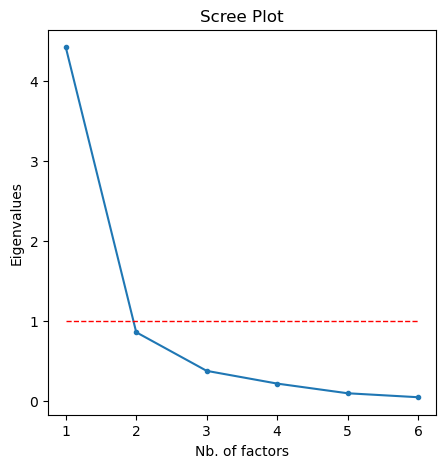

In [22]:
# print scree plot

# first the main plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")

# add Kaiser's threshold line
ax.plot([1,6],[1,1],"r--",linewidth=1)

plt.show()

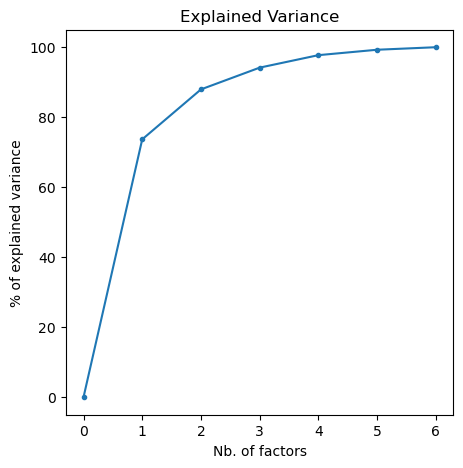

In [23]:
# print explained variance plot

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")

plt.show()

In [24]:
# Applying Barlett's test of Sphericity
# import statistical package from scipy
import scipy.stats as stats

# Bartlett's statistic
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))
print(f"Barlett's statistics: {C:.3f}")

# degree of freedom
ddl = p*(p-1)/2

# p-value
print(f"p-value: {1-stats.chi2.cdf(C,df=ddl):.3f}")

Barlett's statistics: 95.120
p-value: 0.000


In [25]:
# Computing Karlis-Saporta-Spinaki threshold
# impor math package
import math

#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

Karlis-Saporta-Spinaki threshold: 2.085


thresholds for the broken sticks: [2.45       1.45       0.95       0.61666667 0.36666667 0.16666667]


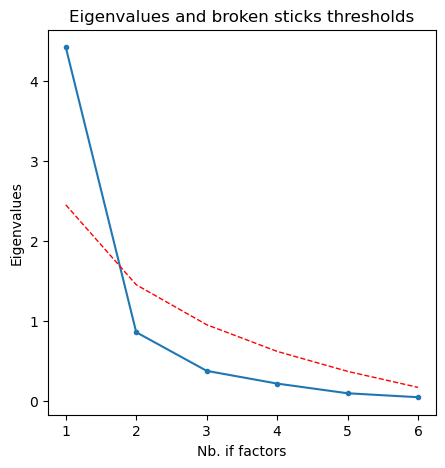

In [26]:
# Broken sticks method
# threshold for the broken sticks
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))
print(f"thresholds for the broken sticks: {b}")

# plot eigenvalues
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. if factors")
ax.set_ylabel("Eigenvalues")
plt.title("Eigenvalues and broken sticks thresholds")

# add broken sticks thresholds
ax.plot(range(1,p+1),b,"r--",linewidth=1)

plt.show()

### Variables representation

In [13]:
# Correlation between variables and factors
print(pandas.DataFrame(acp.col_coord_[:,:2],index=D.columns, columns=['F1','F2']))

             F1        F2
CYL    0.893464 -0.114906
PUISS  0.886858 -0.384689
LONG   0.886155  0.381029
LARG   0.813536  0.412736
POIDS  0.905187  0.224532
VMAX   0.754710 -0.573519


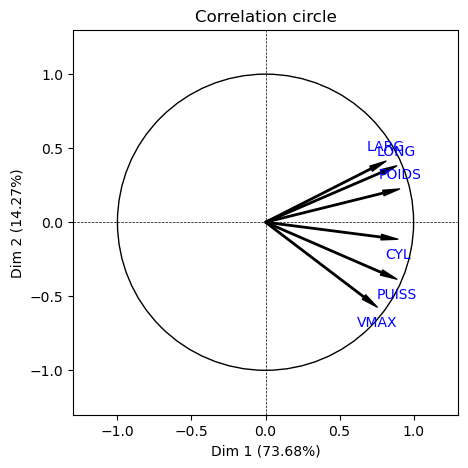

In [14]:
# Correlations circle
acp.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(5,5))

In [15]:
# Cos² if the variables on the two first factors
print(pandas.DataFrame(acp.col_cos2_[:,:2],index=D.columns, columns=['F1','F2']))

             F1        F2
CYL    0.798277  0.013203
PUISS  0.786517  0.147986
LONG   0.785270  0.145183
LARG   0.661841  0.170351
POIDS  0.819364  0.050415
VMAX   0.569588  0.328925


In [16]:
# Cumulated Cos² on the two first factors
print(pandas.DataFrame(np.cumsum(acp.col_cos2_[:,:2],axis=1),index=D.columns, columns=['F1','F2']))

             F1        F2
CYL    0.798277  0.811481
PUISS  0.786517  0.934503
LONG   0.785270  0.930453
LARG   0.661841  0.832192
POIDS  0.819364  0.869779
VMAX   0.569588  0.898512


In [17]:
# Contributions of each variable on the two first factors (in %)
print(pandas.DataFrame(acp.col_contrib_[:,:2],index=D.columns, columns=['F1','F2']))

              F1         F2
CYL    18.057062   1.542342
PUISS  17.791052  17.286793
LONG   17.762847  16.959384
LARG   14.970882  19.899361
POIDS  18.534057   5.889155
VMAX   12.884099  38.422964


### Individuals representation

In [18]:
# individuals factor coordinates on the first plan (of the two first axes)
print(pandas.DataFrame(acp.row_coord_[:,:2],index=D.index))

                        0         1
Modele                             
Alfasud TI      -2.138924 -1.785681
Audi 100         1.561459  1.527040
Simca 1300      -1.119385  0.674505
Citroen GS Club -2.573742 -0.112884
Fiat 132         0.427855 -0.695567
Lancia Beta     -0.304238  0.196149
Peugeot 504      0.683928  0.933057
Renault 16 TL   -1.948493  0.980448
Renault 30       4.409735 -1.063633
Toyota Corolla  -3.985782 -0.236240
Alfetta 1.66     0.437658 -1.912448
Princess 1800    1.018175  0.841712
Datsun 200L      2.941080  0.559175
Taunus 2000      1.314880 -0.486522
Rancho          -0.691111  0.897721
Mazda 9295       0.385709 -0.356185
Opel Rekord      2.289768 -0.104345
Lada 1300       -2.708574  0.143699


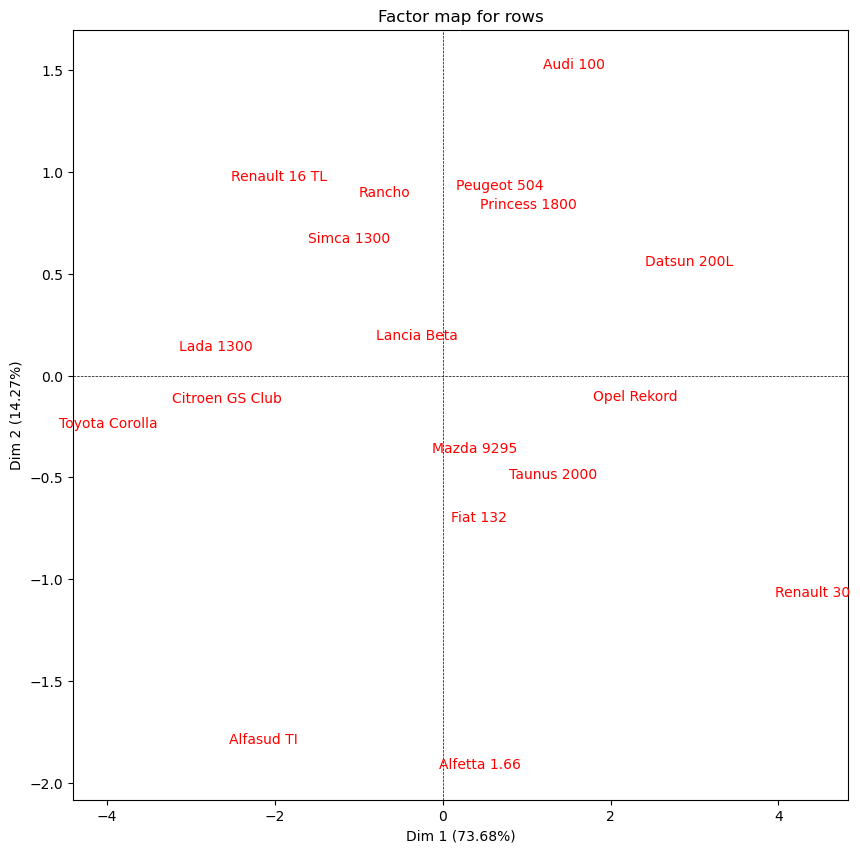

In [19]:
# chart of the individuals
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(10,10))

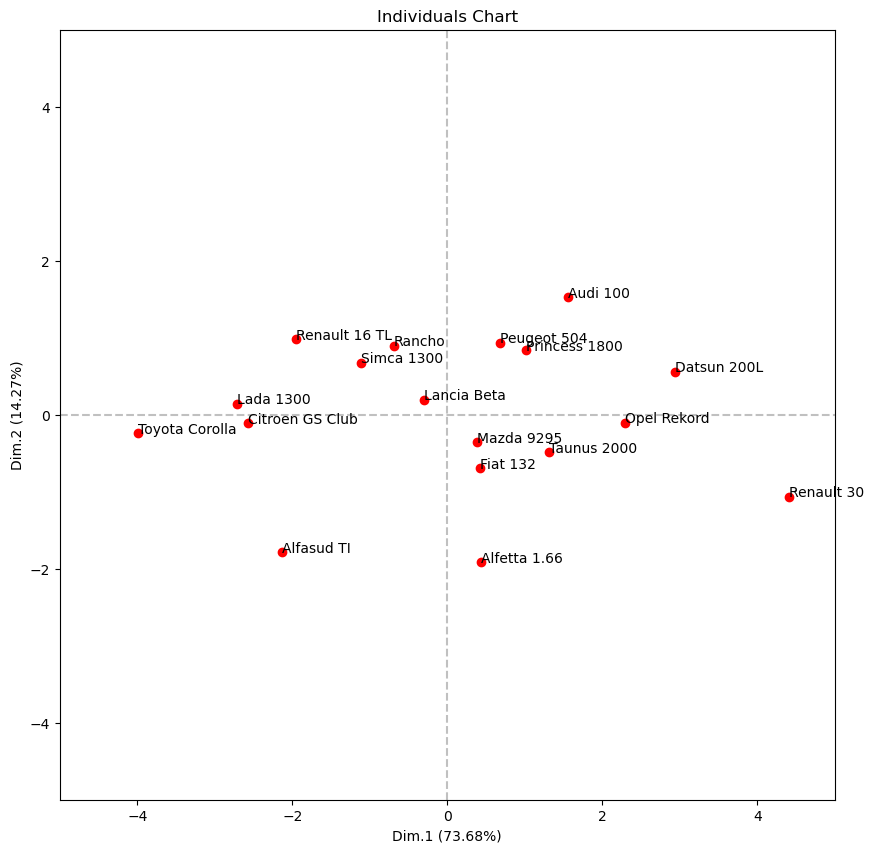

In [20]:
# plot with square scales
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'ro')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (73.68%)")
ax.set_ylabel("Dim.2 (14.27%)")
plt.title("Individuals Chart")

for i in range(n):
    ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i])
    
plt.show()

In [21]:
# standardized data points
Z = (D.values - acp.means_) / acp.std_

# distance to origin from the standardized data
disto = np.apply_along_axis(arr=Z,axis=1,func1d=lambda x: np.sum(x**2))

# distance to origin from the factor coordinates
distoBis = np.sum(acp.row_coord_**2,axis=1)

# compare in a dataframe : distance should be preserved
print(pandas.DataFrame(np.transpose(np.array([disto,distoBis])),index=D.index, columns=['original','factor']))

                  original     factor
Modele                               
Alfasud TI        8.225176   8.225176
Audi 100          6.673755   6.673755
Simca 1300        2.159327   2.159327
Citroen GS Club   6.780145   6.780145
Fiat 132          1.169124   1.169124
Lancia Beta       1.134950   1.134950
Peugeot 504       1.512793   1.512793
Renault 16 TL     5.636826   5.636826
Renault 30       21.789657  21.789657
Toyota Corolla   16.290143  16.290143
Alfetta 1.66      4.456770   4.456770
Princess 1800     1.952513   1.952513
Datsun 200L      11.112624  11.112624
Taunus 2000       2.452986   2.452986
Rancho            1.963373   1.963373
Mazda 9295        0.684521   0.684521
Opel Rekord       6.083119   6.083119
Lada 1300         7.922198   7.922198


In [22]:
# cos² of the individuals
lig_cos2 = np.apply_along_axis(arr=acp.row_coord_[:,:2],axis=0,func1d=lambda x: (x**2)/disto)
print(pandas.DataFrame(lig_cos2,index=D.index, columns=['F1','F2']))

                       F1        F2
Modele                             
Alfasud TI       0.556218  0.387670
Audi 100         0.365334  0.349406
Simca 1300       0.580284  0.210694
Citroen GS Club  0.976992  0.001879
Fiat 132         0.156579  0.413826
Lancia Beta      0.081555  0.033900
Peugeot 504      0.309202  0.575488
Renault 16 TL    0.673539  0.170535
Renault 30       0.892431  0.051920
Toyota Corolla   0.975219  0.003426
Alfetta 1.66     0.042978  0.820652
Princess 1800    0.530947  0.362855
Datsun 200L      0.778390  0.028137
Taunus 2000      0.704819  0.096496
Rancho           0.243273  0.410469
Mazda 9295       0.217336  0.185337
Opel Rekord      0.861900  0.001790
Lada 1300        0.926052  0.002607


In [23]:
# or directly with fanalysis.pca
print(pd.DataFrame(acp.row_cos2_[:,:2],index=D.index, columns=['F1','F2']))

                       F1        F2
Modele                             
Alfasud TI       0.556218  0.387670
Audi 100         0.365334  0.349406
Simca 1300       0.580284  0.210694
Citroen GS Club  0.976992  0.001879
Fiat 132         0.156579  0.413826
Lancia Beta      0.081555  0.033900
Peugeot 504      0.309202  0.575488
Renault 16 TL    0.673539  0.170535
Renault 30       0.892431  0.051920
Toyota Corolla   0.975219  0.003426
Alfetta 1.66     0.042978  0.820652
Princess 1800    0.530947  0.362855
Datsun 200L      0.778390  0.028137
Taunus 2000      0.704819  0.096496
Rancho           0.243273  0.410469
Mazda 9295       0.217336  0.185337
Opel Rekord      0.861900  0.001790
Lada 1300        0.926052  0.002607


In [26]:
dir(acp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'col_contrib_',
 'col_coord_',
 'col_cor_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_topandas',
 'correlation_circle',
 'eig_',
 'eigen_vectors_',
 'fit',
 'fit_transform',
 'get_params',
 'mapping',
 'mapping_col',
 'mapping_row',
 'means_',
 'model_',
 'n_components',
 'n_components_',
 'plot_col_contrib',
 'plot_col_cos2',
 'plot_eigenvalues',
 'p

In [33]:
# cumulated Cos² on the two first axes
print(pd.DataFrame(np.cumsum(acp.row_cos2_[:,:2],axis=1),index=D.index, columns=['F1','F2']))

                       F1        F2
Modele                             
Alfasud TI       0.556218  0.943889
Audi 100         0.365334  0.714741
Simca 1300       0.580284  0.790978
Citroen GS Club  0.976992  0.978871
Fiat 132         0.156579  0.570405
Lancia Beta      0.081555  0.115454
Peugeot 504      0.309202  0.884690
Renault 16 TL    0.673539  0.844075
Renault 30       0.892431  0.944351
Toyota Corolla   0.975219  0.978645
Alfetta 1.66     0.042978  0.863630
Princess 1800    0.530947  0.893802
Datsun 200L      0.778390  0.806527
Taunus 2000      0.704819  0.801315
Rancho           0.243273  0.653742
Mazda 9295       0.217336  0.402674
Opel Rekord      0.861900  0.863690
Lada 1300        0.926052  0.928659


In [34]:
# contributions on the two first factors
lig_ctr = (acp.row_coord_[:,:2]**2)/(n*acp.eig_[0][:2])*100
print(pandas.DataFrame(lig_ctr,index=D.index, columns=['F1','F2']))

                        F1         F2
Modele                               
Alfasud TI        5.749254  20.693307
Audi 100          3.063951  15.132933
Simca 1300        1.574636   2.952519
Citroen GS Club   8.324360   0.082697
Fiat 132          0.230046   3.139789
Lancia Beta       0.116318   0.249686
Peugeot 504       0.587817   5.649867
Renault 16 TL     4.771099   6.238372
Renault 30       24.436884   7.341856
Toyota Corolla   19.964025   0.362185
Alfetta 1.66      0.240708  23.735669
Princess 1800     1.302765   4.597791
Datsun 200L      10.870129   2.029163
Taunus 2000       2.172668   1.536130
Rancho            0.600229   5.230043
Mazda 9295        0.186956   0.823327
Opel Rekord       6.588764   0.070658
Lada 1300         9.219391   0.134007


In [35]:
# check with fanalysis.pca
print(pandas.DataFrame(acp.row_contrib_[:,:2],index=D.index, columns=['F1','F2']))

                        F1         F2
Modele                               
Alfasud TI        5.749254  20.693307
Audi 100          3.063951  15.132933
Simca 1300        1.574636   2.952519
Citroen GS Club   8.324360   0.082697
Fiat 132          0.230046   3.139789
Lancia Beta       0.116318   0.249686
Peugeot 504       0.587817   5.649867
Renault 16 TL     4.771099   6.238372
Renault 30       24.436884   7.341856
Toyota Corolla   19.964025   0.362185
Alfetta 1.66      0.240708  23.735669
Princess 1800     1.302765   4.597791
Datsun 200L      10.870129   2.029163
Taunus 2000       2.172668   1.536130
Rancho            0.600229   5.230043
Mazda 9295        0.186956   0.823327
Opel Rekord       6.588764   0.070658
Lada 1300         9.219391   0.134007


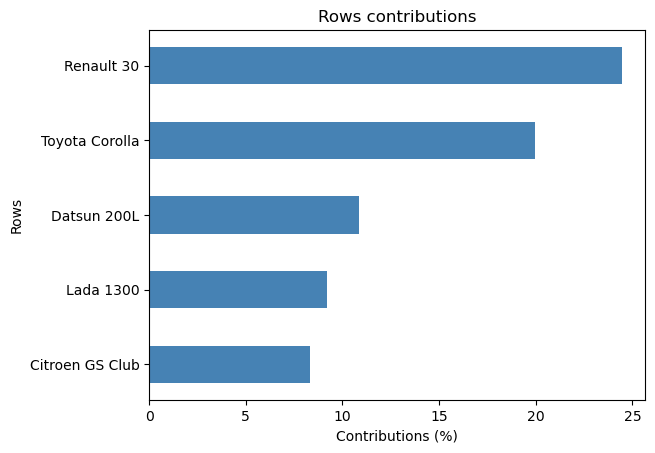

In [36]:
# plot : contributions to the first factor
acp.plot_row_contrib(num_axis=1,nb_values=5)

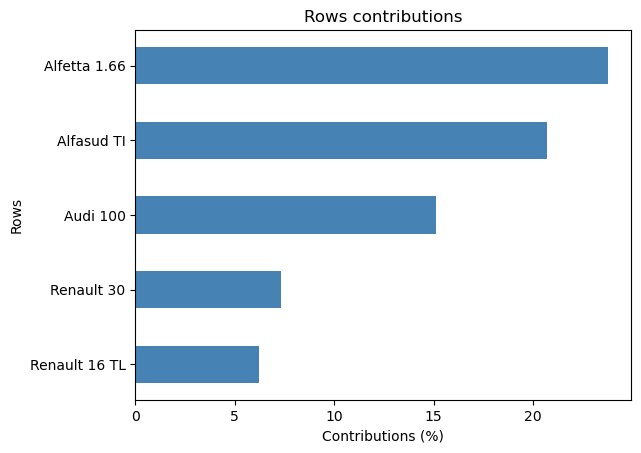

In [37]:
# plot : contributions to the second factor
acp.plot_row_contrib(num_axis=2,nb_values=5)

### Transition relationships

In [38]:
# Coordinates of individuals from variables - Factor 1
f1 = 1/math.sqrt(acp.eig_[0][0]) * np.dot(Z,acp.col_coord_[:,0])

# print and check coordinates
print(pd.DataFrame(np.transpose(np.array([f1,acp.row_coord_[:,0]])),index=D.index, columns=['transition','actual']))

                 transition    actual
Modele                               
Alfasud TI        -2.138924 -2.138924
Audi 100           1.561459  1.561459
Simca 1300        -1.119385 -1.119385
Citroen GS Club   -2.573742 -2.573742
Fiat 132           0.427855  0.427855
Lancia Beta       -0.304238 -0.304238
Peugeot 504        0.683928  0.683928
Renault 16 TL     -1.948493 -1.948493
Renault 30         4.409735  4.409735
Toyota Corolla    -3.985782 -3.985782
Alfetta 1.66       0.437658  0.437658
Princess 1800      1.018175  1.018175
Datsun 200L        2.941080  2.941080
Taunus 2000        1.314880  1.314880
Rancho            -0.691111 -0.691111
Mazda 9295         0.385709  0.385709
Opel Rekord        2.289768  2.289768
Lada 1300         -2.708574 -2.708574


In [39]:
# Coordinates of variables from individuals - Factor 1
r1 = 1/(n*math.sqrt(acp.eig_[0][0])) * np.dot(np.transpose(Z),acp.row_coord_[:,0])

# print and check correlations
print(pd.DataFrame(np.transpose(np.array([r1,acp.col_coord_[:,0]])),index=D.columns, columns=['transition','actual']))

       transition    actual
CYL      0.893464  0.893464
PUISS    0.886858  0.886858
LONG     0.886155  0.886155
LARG     0.813536  0.813536
POIDS    0.905187  0.905187
VMAX     0.754710  0.754710


### Projecting supplementary variables

In [40]:
# load supplementary observations
IndSup = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_IND_SUP",index_col=0)
print(IndSup)

                CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                             
Peugeot 604    2664    136   472   177   1410   180
Peugeot 304 S  1288     74   414   157    915   160


In [41]:
# apply transform on the supplementary observations
coordSup = acp.transform(IndSup.values)
print(coordSup)

[[ 5.56329226 -0.33860928  0.46428878 -0.40214608  0.38981076  0.08102064]
 [-2.21224139 -1.25777905  0.09304388  0.35370189 -0.648528   -0.12473042]]


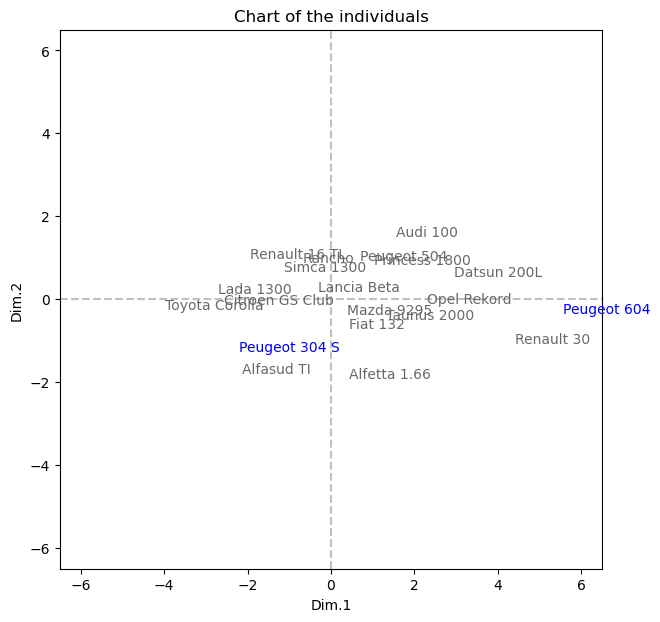

In [43]:
# plot supplementary observations
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-6.5,+6.5,-6.5,+6.5])
ax.plot([-6.5,+6.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-6.5,+6.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Chart of the individuals")

# active data points
for i in range(n):
    ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i],color="dimgray")
    
# supplementary data points
for i in range(IndSup.shape[0]):
    ax.text(coordSup[i,0],coordSup[i,1],IndSup.index[i],color="blue")
    
plt.show()

### Supplementary variables

In [44]:
# upload supplementary variables
varIllus = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_VAR_ILLUS",index_col=0)
print(varIllus)

                FINITION   PRIX  RPOIDPUIS
Modele                                    
Alfasud TI           2_B  30570  11.012658
Audi 100            3_TB  39990  13.058824
Simca 1300           1_M  29600  15.441176
Citroen GS Club      1_M  28250  15.762712
Fiat 132             2_B  34900  11.275510
Lancia Beta         3_TB  35480  13.170732
Peugeot 504          2_B  32300  14.683544
Renault 16 TL        2_B  32000  18.363636
Renault 30          3_TB  47700  10.312500
Toyota Corolla       1_M  26540  14.818182
Alfetta-1.66        3_TB  42395   9.724771
Princess-1800        2_B  33990  14.146341
Datsun-200L         3_TB  43980  11.913043
Taunus-2000          2_B  35010  11.020408
Rancho              3_TB  39450  14.112500
Mazda-9295           1_M  27900  13.192771
Opel-Rekord          2_B  32700  11.200000
Lada-1300            1_M  22100  14.044118


In [45]:
np.corrcoef(varIllus.PRIX,acp.row_coord_[:,:2],rowvar=False)

array([[ 1.00000000e+00,  7.72475241e-01, -8.67084445e-02],
       [ 7.72475241e-01,  1.00000000e+00,  5.07414784e-17],
       [-8.67084445e-02,  5.07414784e-17,  1.00000000e+00]])

In [47]:
np.set_printoptions(linewidth=120)
acp.row_coord_

array([[-2.13892361, -1.78568102, -0.57186228, -0.20192734,  0.30135696, -0.05392079],
       [ 1.56145859,  1.52704027, -1.31527135,  0.21135154, -0.14851614,  0.32723844],
       [-1.11938528,  0.67450517, -0.4565881 ,  0.16762584,  0.37536398, -0.27180323],
       [-2.5737417 , -0.11288416, -0.1485698 ,  0.01734322, -0.22685322, -0.26347623],
       [ 0.4278552 , -0.69556731,  0.19328567,  0.62775448, -0.26350531,  0.03715265],
       [-0.30423764,  0.19614878, -0.67580317,  0.55594137,  0.44508594, -0.20008299],
       [ 0.6839285 ,  0.93305677,  0.25682308, -0.20313429, -0.20865165, -0.15389175],
       [-1.94849257,  0.98044805,  0.61957488, -0.63031916, -0.29316513, -0.10864179],
       [ 4.40973457, -1.06363317,  0.59352842, -0.84724778,  0.37488967, -0.04399657],
       [-3.98578242, -0.23624042,  0.30313336, -0.2651218 , -0.27842846,  0.32889199],
       [ 0.43765819, -1.91244816, -0.02494224,  0.75891042, -0.16810267,  0.05424075],
       [ 1.01817538,  0.8417121 , -0.216610

### Quantitative variables

In [48]:
# correlation of PRIX with the two first factors
cPrix = np.corrcoef(varIllus.PRIX,acp.row_coord_[:,:2],rowvar=False)[0,1:]
print(f"Correlation coordinates of PRIX: {cPrix}")

# correlation of RPOIDPUIS with the two first factors
cRPP = np.corrcoef(varIllus.RPOIDPUIS,acp.row_coord_[:,:2],rowvar=False)[0,1:]
print(f"Correlation coordinates of RPOIDPUIS: {cRPP}")

Correlation coordinates of PRIX: [ 0.77247524 -0.08670844]
Correlation coordinates of RPOIDPUIS: [-0.58903888  0.67254512]


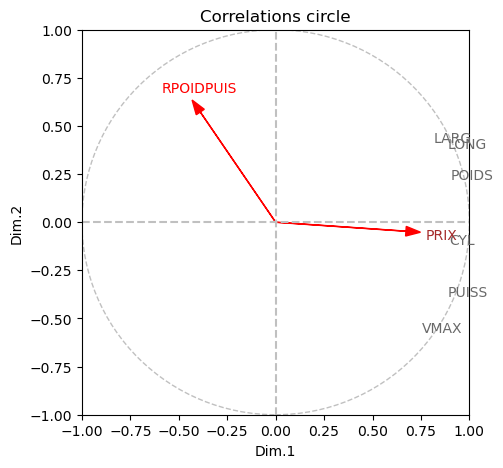

In [49]:
# draw supplementary variables in correlation circle
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(5,5))
ax.axis([-1,+1,-1,+1])
ax.plot([-1,+1],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1,+1],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Correlations circle")

# active variables
for i in range(p):
    ax.text(acp.col_coord_[i,0],acp.col_coord_[i,1],D.columns[i],color="dimgray")

# supplementary variables
ax.text(cPrix[0],cPrix[1],'PRIX',color='brown')
ax.arrow(0,0,cPrix[0]-0.1,cPrix[1]+0.04,color='r',head_width=0.05)

ax.text(cRPP[0],cRPP[1],'RPOIDPUIS',color="red")
ax.arrow(0,0,cRPP[0]+0.2,cRPP[1]-0.1,color='r',head_width=0.05)

# circle
ellipse = Ellipse((0,0),width=2,height=2,facecolor='none',edgecolor='silver',linestyle='--')
ax.add_patch(ellipse)
    
plt.show()

In [50]:
# Correlation of PRIX with all the other factors
cPrixBis = np.corrcoef(varIllus.PRIX,acp.row_coord_[:,:],rowvar=False)[0,1:]
print(cPrixBis)

# squared : Cos²
print(cPrixBis**2)

# sum
print(np.sum(cPrixBis**2))

[ 0.77247524 -0.08670844  0.13389277  0.22582891  0.15944978  0.10254878]
[0.596718   0.00751835 0.01792727 0.0509987  0.02542423 0.01051625]
0.7091028079636765


### Qualitative variables

In [51]:
# create a temporary dataframe
df = varIllus.copy()
df['F1'] = acp.row_coord_[:,0]
df['F2'] = acp.row_coord_[:,1]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada-1300
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FINITION   18 non-null     object 
 1   PRIX       18 non-null     int64  
 2   RPOIDPUIS  18 non-null     float64
 3   F1         18 non-null     float64
 4   F2         18 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 864.0+ bytes
None


In [52]:
# counts per group for FINITION
n_g = pandas.pivot_table(df,values='F1',index='FINITION',aggfunc='count')
print(f"n_g: \n{n_g}\n")

# conditional means on the first factor for FINITION
m_1 = pandas.pivot_table(df,values='F1',index='FINITION',aggfunc='mean')
print(f"m_1: \n{m_1}\n")

# conditional means on the second factor for FINITION
m_2 = pandas.pivot_table(df,values='F2',index='FINITION',aggfunc='mean')
print(f"m_2: \n{m_2}\n")

n_g: 
          F1
FINITION    
1_M        5
2_B        7
3_TB       6

m_1: 
                F1
FINITION          
1_M      -2.000355
2_B       0.235313
3_TB      1.392430

m_2: 
                F2
FINITION          
1_M       0.022579
2_B      -0.045271
3_TB      0.034001



In [ ]:
# Plots of the supplementary individuals in the first factor plane

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des individus - Modalités de FINITION")

# active individuals
for i in range(n):
    ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i],color="gray")
    
# position of the modalities
for g in range(len(m_1.index)):
    ax.text(m_1.F1[g],m_2.F2[g],m_1.index[g],color="red",weight="bold",fontsize=16)
    
plt.show()

In [ ]:
# correlation ratio on the first factor
print(np.sum((n_g.F1/n)*(m_1.F1**2))/acp.eig_[0][0])

# correlation ratio on the second factor
print(np.sum((n_g.F1/n)*(m_2.F2**2))/acp.eig_[0][1])

In [ ]:
# test value on the first factor
vt_1 = (m_1.F1)/np.sqrt((n-n_g.F1)/(n-1)*(acp.eig_[0][0]/n_g.F1))
print(vt_1)

In [ ]:
# transform Z into a dataframe
dfZ = pandas.DataFrame(Z,columns=D.columns,index=varIllus.index)

# add column FINITION
dfZ['FINITION'] = varIllus['FINITION']

# check
print(dfZ.info())

In [ ]:
# conditional means on the z variable
mz_g = pandas.pivot_table(dfZ,index='FINITION',aggfunc='mean')
print(mz_g)

In [ ]:
# distance to origin
disto2_g = np.apply_along_axis(arr=mz_g.values,axis=1,func1d=lambda x:np.sum(x**2))
print(np.sqrt(disto2_g))

In [ ]:
# Cos² on the first factor
print((m_1.values[:,0]**2)/disto2_g)

In [ ]:
# Cos² on the second
print((m_2.values[:,0]**2)/disto2_g)